In [1]:
%matplotlib inline
import numpy as np
import pylab as pl

import sys
sys.path.insert(0, '../src/susceptibility_tensor')
sys.path.insert(0, '../build')
from susceptibility_interpolator import chi_ij
import susceptibility_tensor.susceptibilityPy as susp

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'large'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'large'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'large'
pl.rcParams['ytick.direction']  = 'in'

In [3]:
#define constants
epsilon0  = 1./(4. * np.pi)
e         = 4.80320680e-10
m         = 9.1093826e-28
c         = 2.99792458e10
epsilon   = -1.

def nu_c(magnetic_field):
    ans = e * magnetic_field / (2. * np.pi * m * c)
    return ans

nuratio = np.logspace(0., 1., 3)

print nu_c(1.)

2799250.54225


/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


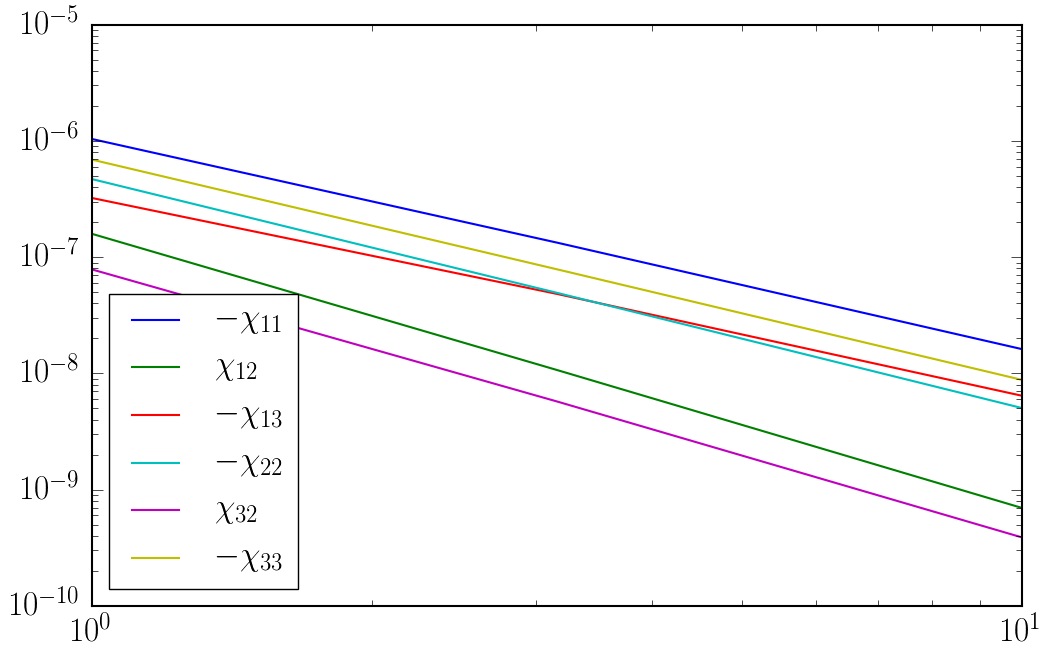

In [4]:
pl.loglog(nuratio, -np.vectorize(chi_ij)(nuratio * nu_c(1.), 1, 1., np.pi/3., 0, 1, 10., 3., 1., 1000., 1e10, 3.5, 10., 11), label='$-\\chi_{11}$')
pl.loglog(nuratio, np.vectorize(chi_ij)(nuratio * nu_c(1.), 1, 1., np.pi/3., 0, 1, 10., 3., 1., 1000., 1e10, 3.5, 10., 12), label='$\\chi_{12}$')
pl.loglog(nuratio, -np.vectorize(chi_ij)(nuratio * nu_c(1.), 1, 1., np.pi/3., 0, 1, 10., 3., 1., 1000., 1e10, 3.5, 10., 13), label='$-\\chi_{13}$')
pl.loglog(nuratio, -np.vectorize(chi_ij)(nuratio * nu_c(1.), 1, 1., np.pi/3., 0, 1, 10., 3., 1., 1000., 1e10, 3.5, 10., 22), label='$-\\chi_{22}$')
pl.loglog(nuratio, np.vectorize(chi_ij)(nuratio * nu_c(1.), 1, 1., np.pi/3., 0, 1, 10., 3., 1., 1000., 1e10, 3.5, 10., 32), label='$\\chi_{32}$')
pl.loglog(nuratio, -np.vectorize(chi_ij)(nuratio * nu_c(1.), 1, 1., np.pi/3., 0, 1, 10., 3., 1., 1000., 1e10, 3.5, 10., 33), label='$-\\chi_{33}$')

pl.legend(loc='lower left')

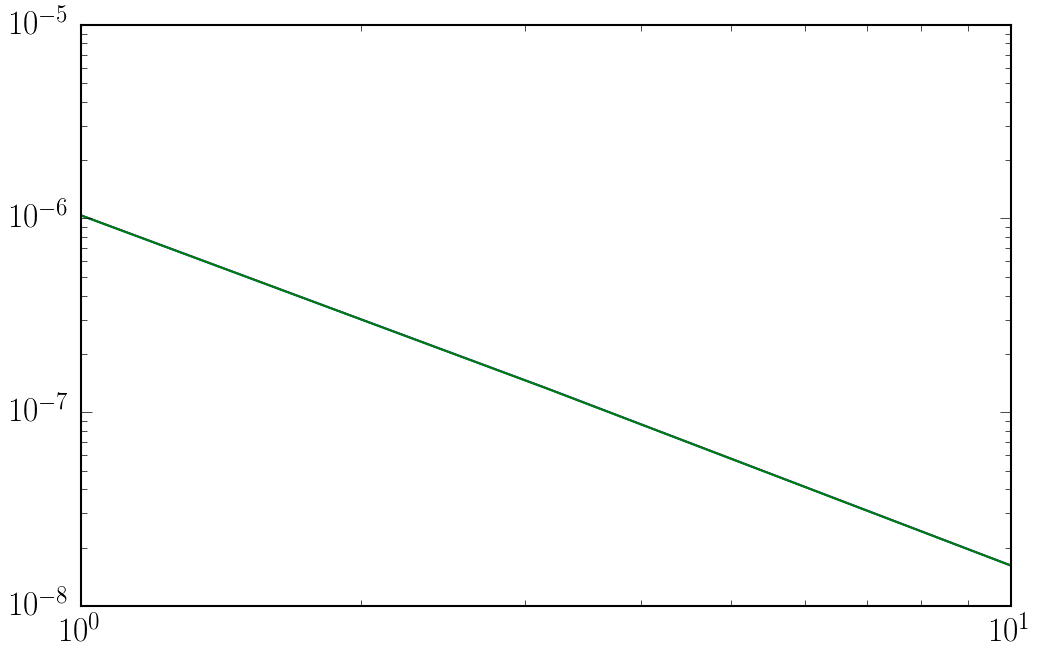

In [5]:
pl.loglog(nuratio, -np.vectorize(chi_ij)(nuratio * nu_c(1.), 1, 1., np.pi/3., 0, 1, 10., 3., 1., 1000., 1e10, 3.5, 10., 11))
pl.loglog(nuratio, -np.vectorize(susp.chi_11_symphony_py)(nuratio * nu_c(1.), 1., 1., np.pi/3., 0, 1, 10., 3., 1., 1000., 1e10, 3.5, 10.))